In [20]:
import pydicom
import os
import pandas as pd
##showing the first few lines of the label file. '1' represents the patient has cancer, 
##while '0' means the patient doesn't have cancer
data_dir = ('/Users/apple/Desktop/project/data_preprocessing/sample')
patients = os.listdir(data_dir)
labels_df = pd.read_csv('/Users/apple/Desktop/project/data_preprocessing/sample/stage1_labels.csv',index_col=0)
labels_df.head()


,cancer
id,
0015ceb851d7251b8f399e39779d1e7d,1
0030a160d58723ff36d73f41b170ec21,0
003f41c78e6acfa92430a057ac0b306e,0
006b96310a37b36cccb2ab48d10b49a3,1
008464bb8521d09a42985dd8add3d0d2,1


In [21]:
##pixel_array shape, number of slices and patient id
##get all the slices for the first five patients
for patient in patients[:5]:
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir +'/'+ patient
    slices =  slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    print (slices[0].pixel_array.shape, len(slices), patient)

(512, 512) 110 0a38e7597ca26f9374f8ea2770ba870d
(512, 512) 134 00cba091fa4ad62cc3200a657aeb957e


KeyError: '0b20184e0cd497028bdd155d9fb42dc9'

In [ ]:
##total number of patients +1(label file)
len(patients)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
IMG_PX_SIZE = 150
for patient in patients[:1]:
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir +'/'+ patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    
    
    plt.imshow(slices[0].pixel_array)
    plt.show()
    

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
IMG_PX_SIZE = 150
for patient in patients[:4]:
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir +'/'+ patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    print(slices[0].pixel_array.shape, len(slices))
    #fig = plt.figure()
    #for num, each_slice in enumerate(slices[:9]):
     #   y = fig.add_subplot(3,3,num+1)
      #  new_img = cv2.resize(np.array(each_slice.pixel_array), (IMG_PX_SIZE, IMG_PX_SIZE))
       # y.imshow(new_img, cmap='gray')
    #plt.show()

(512, 512) 110
(512, 512) 134


KeyError: '0b20184e0cd497028bdd155d9fb42dc9'

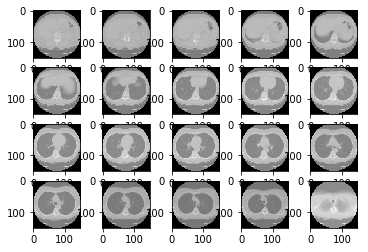

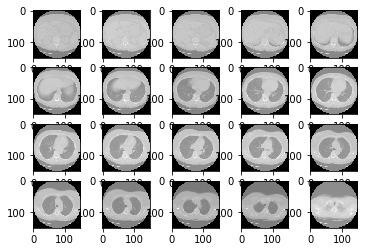

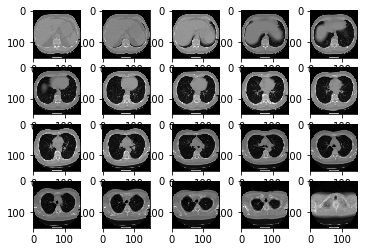

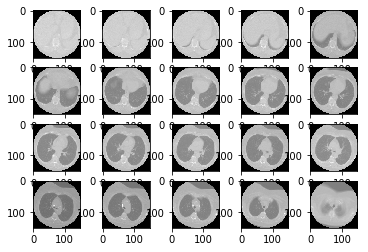

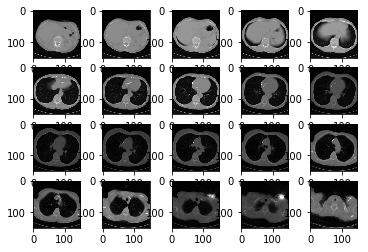

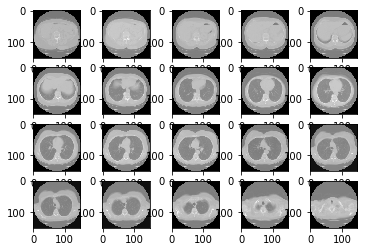

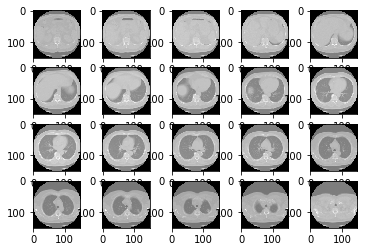

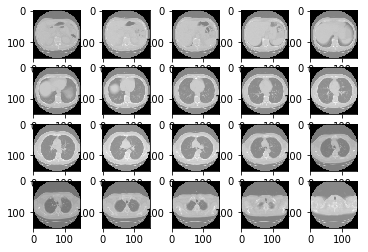

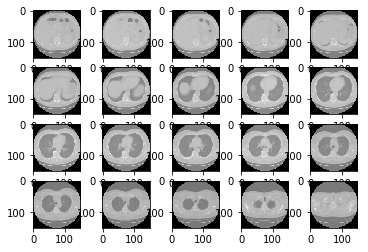

In [53]:
import math

def chunks(l, n):
    for i in range (0, len(l), n):
        yield l[i:i+n]
                
def mean(l):
    return sum(l) / len(l)

IMG_PX_SIZE = 150
NUM_SLICES = 20
for patient in patients[:10]:
    try:
        label = labels_df.get_value(patient, 'cancer')
        path = data_dir +'/'+ patient
        slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
        slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
        new_slices = []
        slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE, IMG_PX_SIZE)) for each_slice in slices]
        chunk_sizes = math.floor(len(slices) / NUM_SLICES)
        for slice_chunk in chunks(slices, chunk_sizes):
            slice_chunk= list(map(mean, zip(*slice_chunk)))
            new_slices.append(slice_chunk)
        if len(new_slices)>NUM_SLICES:
            more_slices = []
            for new_slice in new_slices[NUM_SLICES-1:]:
                more_slices.append(new_slice)
            new_final_slice = list(map(mean, zip(*more_slices)))
            for i in range (0, len(new_slices)-NUM_SLICES):
                del new_slices[-1]
            new_slices[NUM_SLICES-1]=new_final_slice
                
        fig = plt.figure()
        for num, each_slice in enumerate (new_slices):
            y = fig.add_subplot(4,5,num+1)
            y.imshow(each_slice, cmap='gray')
        plt.show()
    except:
        pass
        
        

In [23]:
import numpy as np
import pandas as pd
import pydicom
import os
import matplotlib.pyplot as plt
import cv2
import math

IMG_SIZE_PX = 100
SLICES_NUM = 20

def chunks(l, n):
    for i in range (0, len(l), n):
        yield l[i:i+n]
                
def mean(l):
    return sum(l) / len(l)

def process_data (patient, labels_df, img_size_px = 50, slices_num = 20, visulizable=False):
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir +'/'+ patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    
    #resize the images and chunk the slices
    new_slices = []
    slices = [cv2.resize(np.array(each_slice.pixel_array),(img_size_px, img_size_px)) for each_slice in slices]
    print(len(slices))
    chunk_sizes = math.floor(len(slices) / slices_num)
    for slice_chunk in chunks(slices, chunk_sizes):
        slice_chunk= list(map(mean, zip(*slice_chunk)))
        new_slices.append(slice_chunk)
    if len(new_slices)>slices_num:
        more_slices = []
        for new_slice in new_slices[slices_num-1:]:
            more_slices.append(new_slice)
        new_final_slice = list(map(mean, zip(*more_slices)))
        for i in range (0, len(new_slices)-slices_num):
            del new_slices[-1]
        new_slices[slices_num-1]=new_final_slice
                
    if visulizable:
        fig = plt.figure()
        for num, each_slice in enumerate (new_slices):
            y = fig.add_subplot(4,5,num+1)
            y.imshow(each_slice, cmap='gray')
        plt.show()
        
    if label==1: label=np.array([1,0])
    elif label==0: label=np.array([0,1])
        
    return np.array(new_slices), label

data_dir = ('/Volumes/yj373/sample')
patients = os.listdir(data_dir)
labels = pd.read_csv('/Volumes/yj373/sample/stage1_labels.csv',index_col=0)

processed_data_image = []
processed_data_label = []

for num, patient in enumerate (patients):
    if num%10 == 0:
        print(num)
    try:
        img_data, label = process_data(patient, labels, IMG_SIZE_PX, SLICES_NUM, False)
        processed_data_image.append(img_data)
        processed_data_label.append(label)
    except KeyError as e:
        print("unlabeled data!")
        pass
        
np.save('processed_data_image.npy'.format(IMG_SIZE_PX,IMG_SIZE_PX,SLICES_NUM), processed_data_image)
np.save('processed_data_label.npy', processed_data_label)

        
    
    

0


OSError: [Errno 22] Invalid argument: '/Volumes/yj373/sample/00cba091fa4ad62cc3200a657aeb957e/034673134cbef5ea15ff9e0c8090500a.dcm'

In [9]:
data = np.load('processed_data_image.npy')
print (data)
data2 = np.load('processed_data_label.npy')
print (data2)

[[[[-2000.         -2000.         -2000.         ..., -2000.         -2000.
    -2000.        ]
   [-2000.         -2000.         -2000.         ..., -2000.         -2000.
    -2000.        ]
   [-2000.         -2000.         -2000.         ..., -2000.         -2000.
    -2000.        ]
   ..., 
   [-2000.         -2000.         -2000.         ..., -2000.         -2000.
    -2000.        ]
   [-2000.         -2000.         -2000.         ..., -2000.         -2000.
    -2000.        ]
   [-2000.         -2000.         -2000.         ..., -2000.         -2000.
    -2000.        ]]

  [[-2000.         -2000.         -2000.         ..., -2000.         -2000.
    -2000.        ]
   [-2000.         -2000.         -2000.         ..., -2000.         -2000.
    -2000.        ]
   [-2000.         -2000.         -2000.         ..., -2000.         -2000.
    -2000.        ]
   ..., 
   [-2000.         -2000.         -2000.         ..., -2000.         -2000.
    -2000.        ]
   [-2000.         -